In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [5]:

df=pd.read_csv('/content/insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [4]:

df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [5]:
df.shape

(1338, 7)

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

No Duplicates and No null values are present in Dataset

In [10]:
df.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


using describe we can see the min,max age,childeren they have ,bmi and avg expenses of people

In [12]:
df.sex.unique()

array(['female', 'male'], dtype=object)

No of smoker based on sex

In [27]:
#no of smoker counts based on sex
smoker_count = df.groupby(['sex'])['smoker'].value_counts().unstack()
smoker_count

smoker,no,yes
sex,,
female,547,115
male,516,159


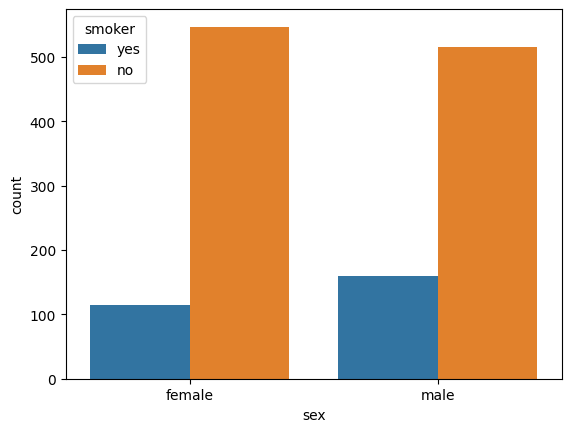

In [18]:
#count or smokers based on sex
sns.countplot(x='sex',hue='smoker',data=df)
plt.show()

There is more number of male smokers

**No of smoker based on sex and region**

In [40]:
#no of smoker counts based on sex and region
smoker_count = df.groupby(['sex', 'region'])['smoker'].value_counts().unstack()
smoker_count

smoker             no  yes
sex    region             
female northeast  132   29
       northwest  135   29
       southeast  139   36
       southwest  141   21
male   northeast  125   38
       northwest  131   29
       southeast  134   55
       southwest  126   37

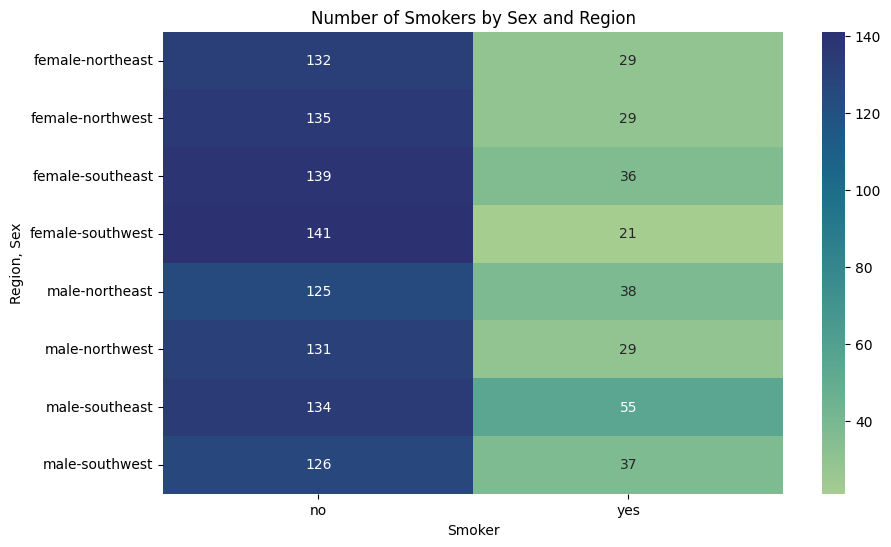

In [63]:

# Convert the counts to integers for better readability in annotations
annot = smoker_count.astype(int).astype(str)

plt.figure(figsize=(10, 6))
sns.heatmap(smoker_count, annot=annot,fmt="",cmap="crest" )#fmt used for additional formating of annot and in this case it's empty mean no extra formating to be done even by default
plt.title('Number of Smokers by Sex and Region')
plt.xlabel('Smoker')
plt.ylabel('Region, Sex')
plt.show()


The highest number of male smokers is in the Southeast and the highest number of female smokers are in southeast

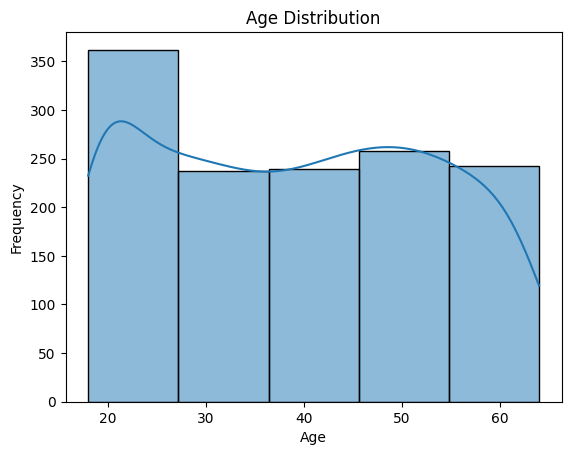

In [18]:
#histogram for age
sns.histplot(df['age'],bins=5,kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

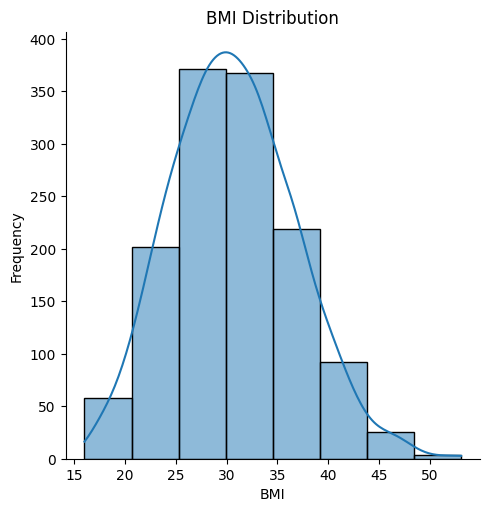

In [20]:
#histogram for bmi
sns.displot(df['bmi'],bins=8,kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

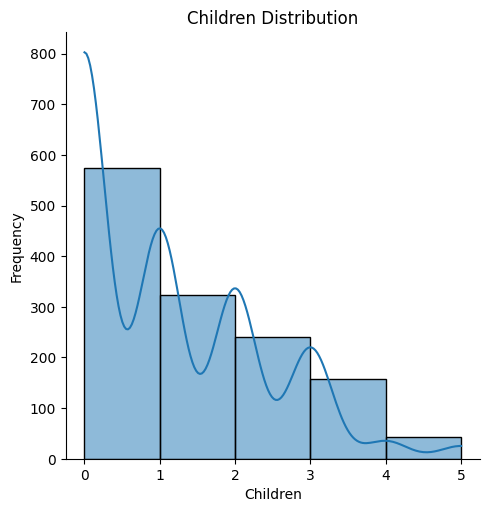

In [21]:
#histogram for children distribution
sns.displot(df['children'],bins=5,kde=True)
plt.title('Children Distribution')
plt.xlabel('Children')
plt.ylabel('Frequency')
plt.show()
#

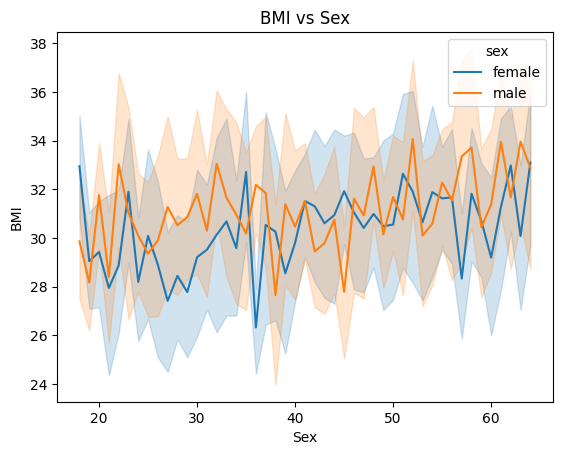

In [41]:
# lineplot graph of bmi vs age
sns.lineplot(x='age',y='bmi',data=df,hue="sex")
plt.title('BMI vs Sex')
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.show()


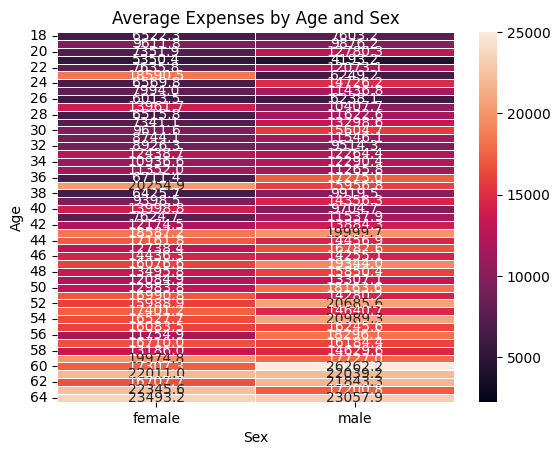

<Figure size 200000x900000 with 0 Axes>

In [86]:
# heatplot for distribution of expenses according to age grouped by sex
pivot_table = df.pivot_table(values='expenses', index='age', columns='sex', aggfunc='mean')
#convert pivot table string value to int for better represntation

sns.heatmap(pivot_table,vmax=2500,vmin=25000,annot=True, fmt=".1f",linewidth=.5)
plt.title('Average Expenses by Age and Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.figure(figsize=(2000, 9000))
plt.show()


    age  children
0    18        69
1    19        68
2    20        29
3    21        28
4    22        28
5    23        28
6    24        28
7    25        28
8    26        28
9    27        28
10   28        28
11   29        27
12   30        27
13   31        27
14   32        26
15   33        26
16   34        26
17   35        25
18   36        25
19   37        25
20   38        25
21   39        25
22   40        27
23   41        27
24   42        27
25   43        27
26   44        27
27   45        29
28   46        29
29   47        29
30   48        29
31   49        28
32   50        29
33   51        29
34   52        29
35   53        28
36   54        28
37   55        26
38   56        26
39   57        26
40   58        25
41   59        25
42   60        23
43   61        23
44   62        23
45   63        23
46   64        22


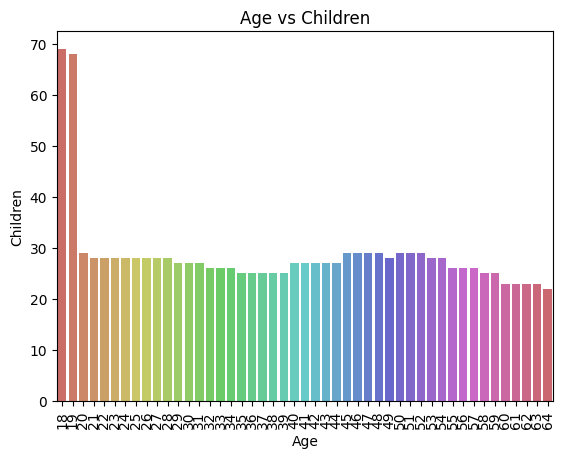

In [117]:
#children as per age
children_age=df.groupby('age')['children'].count().reset_index()
"""print(children_age)"""
"""sns.lineplot(x='age',y='children',data=df)
plt.title('Age vs Children')
plt.xlabel('Age')
plt.ylabel('Children')
plt.show()"""


sns.barplot(x='age',y='children',data=children_age,palette="hls")
plt.title('Age vs Children')
plt.xlabel('Age')
plt.ylabel('Children')
plt.xticks(rotation=90)
plt.show()


#

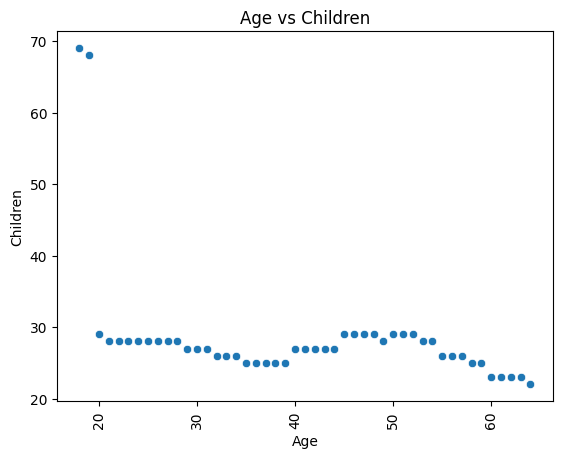

In [115]:
sns.scatterplot(x='age',y='children',data=children_age) # Corrected function name from scartterplot to scatterplot
plt.title('Age vs Children')
plt.xlabel('Age')
plt.ylabel('Children')
plt.xticks(rotation=90)
plt.show()